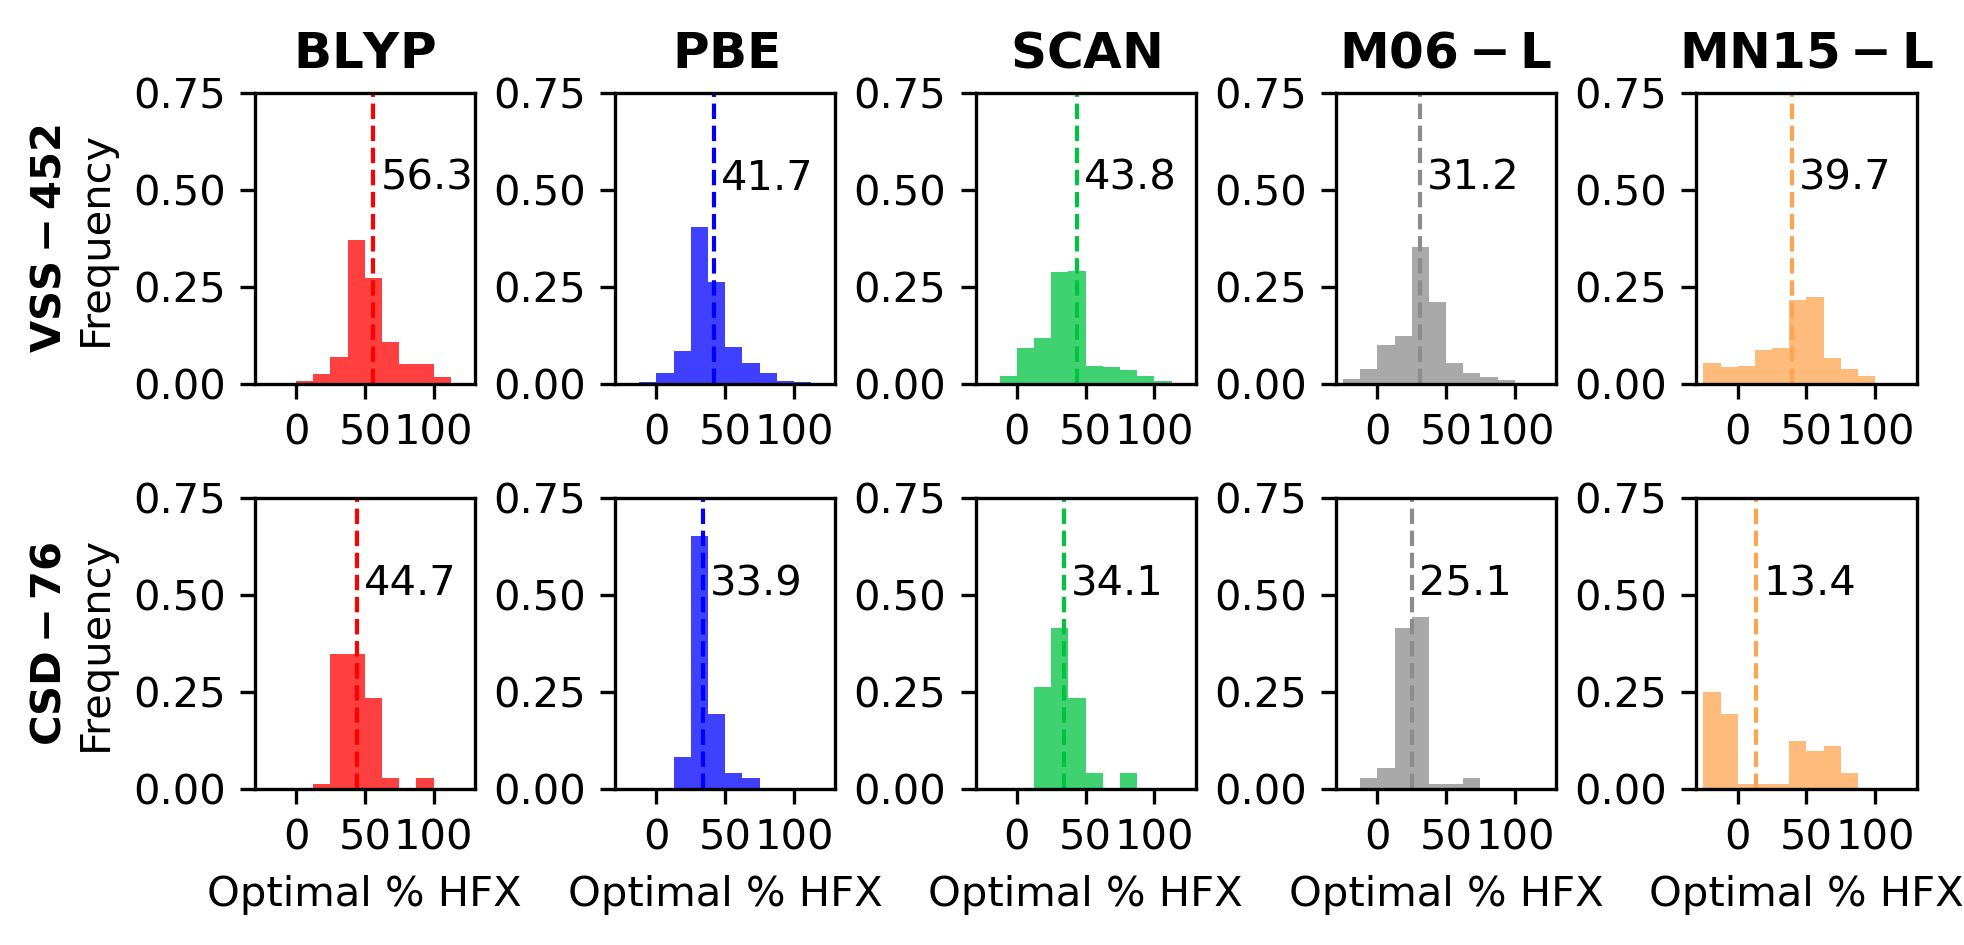

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import minimize

vss_df = pd.read_csv('../data/VSS-452.csv')
csd_df = pd.read_csv('../data/CSD-76.csv')
to_remove = []
for idx, row in csd_df.iterrows():
    if 'Cr' in row['name']:
        to_remove.append(idx)
csd_df = csd_df.drop(to_remove)

functionals = ['blyp', 'pbe', 'scan', 'm06-l', 'mn15-l']
hfx_amounts = ['10', '20', '30', '40', '50']

csd_opt = {f: [] for f in functionals}
vss_opt = {f: [] for f in functionals}

for base_functional in functionals:
    for idx, df in enumerate([csd_df, vss_df]):
        errors = []
        for _, row in df.iterrows():
            optimal_vsse = row['dlpno-CCSD_T.vertsse']
            hfxs = []
            vsses = []
            if not np.isnan(row[f'{base_functional}.vertsse']):
                hfxs.append(0)
                vsses.append(row[f'{base_functional}.vertsse'])
            for hfx in hfx_amounts:
                functional = base_functional + '_hfx_' + hfx
                if not np.isnan(row[f'{functional}.vertsse']):
                    hfxs.append(int(hfx))
                    vsses.append(row[f'{functional}.vertsse'])
            fit = interp1d(hfxs, vsses, kind='linear', fill_value='extrapolate')
            sse_intersection = lambda hfx: (fit(hfx) - optimal_vsse)**2
            res = minimize(sse_intersection, 25, method='Nelder-Mead')
            if res.success:
                hfx = res.x[0]
                if idx == 0:
                    csd_opt[base_functional].append(hfx)
                else:
                    vss_opt[base_functional].append(hfx)

colors = ['#FF0000', '#0000FF', '#00C440', '#8c8c8c', '#FFA550', '#00FFFF']
bins = np.arange(-25, 125, 12.5)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(6.5, 3.25), dpi=300)
ax[1,0].hist(csd_opt['blyp'], color=colors[0], alpha=0.75, weights=np.ones(len(csd_opt['blyp']))/len(csd_opt['blyp']), bins=bins)
ax[1,1].hist(csd_opt['pbe'], color=colors[1], alpha=0.75, weights=np.ones(len(csd_opt['pbe']))/len(csd_opt['pbe']), bins=bins)
ax[1,2].hist(csd_opt['scan'], color=colors[2], alpha=0.75, weights=np.ones(len(csd_opt['scan']))/len(csd_opt['scan']), bins=bins)
ax[1,3].hist(csd_opt['m06-l'], color=colors[3], alpha=0.75, weights=np.ones(len(csd_opt['m06-l']))/len(csd_opt['m06-l']), bins=bins)
ax[1,4].hist(csd_opt['mn15-l'], color=colors[4], alpha=0.75, weights=np.ones(len(csd_opt['mn15-l']))/len(csd_opt['mn15-l']), bins=bins)

ax[1,0].axvline(np.mean(csd_opt['blyp']), ls='--', linewidth=1, color=colors[0])
ax[1,0].text(np.mean(csd_opt['blyp'])+5, 0.5, f'{np.mean(csd_opt["blyp"]):1.1f}')
ax[1,1].axvline(np.mean(csd_opt['pbe']), ls='--', linewidth=1, color=colors[1])
ax[1,1].text(np.mean(csd_opt['pbe'])+5, 0.5, f'{np.mean(csd_opt["pbe"]):1.1f}')
ax[1,2].axvline(np.mean(csd_opt['scan']), ls='--', linewidth=1, color=colors[2])
ax[1,2].text(np.mean(csd_opt['scan'])+5, 0.5, f'{np.mean(csd_opt["scan"]):1.1f}')
ax[1,3].axvline(np.mean(csd_opt['m06-l']), ls='--', linewidth=1, color=colors[3])
ax[1,3].text(np.mean(csd_opt['m06-l'])+5, 0.5, f'{np.mean(csd_opt["m06-l"]):1.1f}')
ax[1,4].axvline(np.mean(csd_opt['mn15-l']), ls='--', linewidth=1, color=colors[4])
ax[1,4].text(np.mean(csd_opt['mn15-l'])+5, 0.5, f'{np.mean(csd_opt["mn15-l"]):1.1f}')

ax[0,0].axvline(np.mean(vss_opt['blyp']), ls='--', linewidth=1, color=colors[0])
ax[0,0].text(np.mean(vss_opt['blyp'])+5, 0.5, f'{np.mean(vss_opt["blyp"]):1.1f}')
ax[0,1].axvline(np.mean(vss_opt['pbe']), ls='--', linewidth=1, color=colors[1])
ax[0,1].text(np.mean(vss_opt['pbe'])+5, 0.5, f'{np.mean(vss_opt["pbe"]):1.1f}')
ax[0,2].axvline(np.mean(vss_opt['scan']), ls='--', linewidth=1, color=colors[2])
ax[0,2].text(np.mean(vss_opt['scan'])+5, 0.5, f'{np.mean(vss_opt["scan"]):1.1f}')
ax[0,3].axvline(np.mean(vss_opt['m06-l']), ls='--', linewidth=1, color=colors[3])
ax[0,3].text(np.mean(vss_opt['m06-l'])+5, 0.5, f'{np.mean(vss_opt["m06-l"]):1.1f}')
ax[0,4].axvline(np.mean(vss_opt['mn15-l']), ls='--', linewidth=1, color=colors[4])
ax[0,4].text(np.mean(vss_opt['mn15-l'])+5, 0.5, f'{np.mean(vss_opt["mn15-l"]):1.1f}')

ax[0,0].hist(vss_opt['blyp'], color=colors[0], alpha=0.75, weights=np.ones(len(vss_opt['blyp']))/len(vss_opt['blyp']), bins=bins)
ax[0,1].hist(vss_opt['pbe'], color=colors[1], alpha=0.75, weights=np.ones(len(vss_opt['pbe']))/len(vss_opt['pbe']), bins=bins)
ax[0,2].hist(vss_opt['scan'], color=colors[2], alpha=0.75, weights=np.ones(len(vss_opt['scan']))/len(vss_opt['scan']), bins=bins)
ax[0,3].hist(vss_opt['m06-l'], color=colors[3], alpha=0.75, weights=np.ones(len(vss_opt['m06-l']))/len(vss_opt['m06-l']), bins=bins)
ax[0,4].hist(vss_opt['mn15-l'], color=colors[4], alpha=0.75, weights=np.ones(len(vss_opt['mn15-l']))/len(vss_opt['mn15-l']), bins=bins)

ax[0,0].set_title(r'$\bf{BLYP}$')
ax[0,1].set_title(r'$\bf{PBE}$')
ax[0,2].set_title(r'$\bf{SCAN}$')
ax[0,3].set_title(r'$\bf{M06-L}$')
ax[0,4].set_title(r'$\bf{MN15-L}$')

ax[0,0].set_xlim((-30,130))
ax[0,1].set_xlim((-30,130))
ax[0,2].set_xlim((-30,130))
ax[0,3].set_xlim((-30,130))
ax[0,4].set_xlim((-30,130))
ax[1,0].set_xlim((-30,130))
ax[1,1].set_xlim((-30,130))
ax[1,2].set_xlim((-30,130))
ax[1,3].set_xlim((-30,130))
ax[1,4].set_xlim((-30,130))

ax[0,0].set_ylim((-0, 0.75))
ax[0,1].set_ylim((-0, 0.75))
ax[0,2].set_ylim((-0, 0.75))
ax[0,3].set_ylim((-0, 0.75))
ax[0,4].set_ylim((-0, 0.75))
ax[1,0].set_ylim((-0, 0.75))
ax[1,1].set_ylim((-0, 0.75))
ax[1,2].set_ylim((-0, 0.75))
ax[1,3].set_ylim((-0, 0.75))
ax[1,4].set_ylim((-0, 0.75))

ax[1,0].set_ylabel(r'$\bf{CSD-76}$' + '\nFrequency')
ax[0,0].set_ylabel(r'$\bf{VSS-452}$' + '\nFrequency')
ax[1,0].set_xlabel('Optimal % HFX')
ax[1,1].set_xlabel('Optimal % HFX')
ax[1,2].set_xlabel('Optimal % HFX')
ax[1,3].set_xlabel('Optimal % HFX')
ax[1,4].set_xlabel('Optimal % HFX')

ax[0,0].set_xticks([0, 50, 100])
ax[0,1].set_xticks([0, 50, 100])
ax[0,2].set_xticks([0, 50, 100])
ax[0,3].set_xticks([0, 50, 100])
ax[0,4].set_xticks([0, 50, 100])
ax[1,0].set_xticks([0, 50, 100])
ax[1,1].set_xticks([0, 50, 100])
ax[1,2].set_xticks([0, 50, 100])
ax[1,3].set_xticks([0, 50, 100])
ax[1,4].set_xticks([0, 50, 100])

fig.tight_layout()